In [176]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [177]:
df=pd.read_csv('../Rickson Lima\Documents\Conhecimento profundo\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [178]:
target_column = ['Diabetes_binary'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,0.304663,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,0.567416,0.125068,0.193681,0.252730,0.456997,0.660312,0.820159,0.712289
std,0.500004,0.495960,0.499342,0.155336,0.072591,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,0.222713,0.271854,0.335409,0.434581,0.498151,0.219396,0.171513,0.271899
min,0.000000,0.000000,0.000000,0.000000,0.122449,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.076923,0.166667,0.125000
25%,0.000000,0.000000,0.000000,1.000000,0.255102,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.538462,0.666667,0.500000
50%,0.500000,1.000000,1.000000,1.000000,0.295918,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.692308,0.833333,0.750000
75%,1.000000,1.000000,1.000000,1.000000,0.336735,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.800000,0.066667,0.200000,1.000000,1.000000,0.846154,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


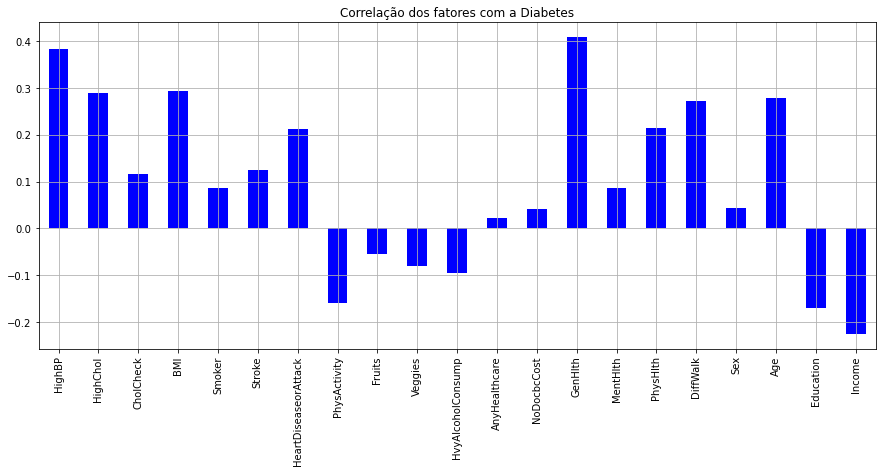

In [179]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlação dos fatores com a Diabetes",color="blue");

In [180]:
# Construindo o modelo
X = df[predictors].values
Y = df[target_column].values

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(49484, 21)
(21208, 21)


In [182]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [183]:
model = Sequential()
model.add(Dense(500, input_dim=21, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [184]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5336 - accuracy: 0.7342
Epoch 2/100
1547/1547 [==============================] - 4s 2ms/step - loss: 0.5180 - accuracy: 0.7422
Epoch 3/100
1547/1547 [==============================] - 4s 2ms/step - loss: 0.5135 - accuracy: 0.7466
Epoch 4/100
1547/1547 [==============================] - 4s 2ms/step - loss: 0.5105 - accuracy: 0.7465
Epoch 5/100
1547/1547 [==============================] - 4s 2ms/step - loss: 0.5092 - accuracy: 0.7493
Epoch 6/100
1547/1547 [==============================] - 4s 2ms/step - loss: 0.5076 - accuracy: 0.7494
Epoch 7/100
1547/1547 [==============================] - 4s 2ms/step - loss: 0.5056 - accuracy: 0.7516
Epoch 8/100
1547/1547 [==============================] - 3s 2ms/step - loss: 0.5060 - accuracy: 0.7515
Epoch 9/100
1547/1547 [==============================] - 3s 2ms/step - loss: 0.5036 - accuracy: 0.7523
Epoch 10/100
1547/1547 [==============================] - 3s 2ms/step - l

In [185]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

1547/1547 [==============================] - 3s 2ms/step
Accuracy on training data: 0.8481529355049133% 
 Error on training data: 0.15184706449508667
663/663 [==============================] - 2s 3ms/step
Accuracy on test data: 0.7213315963745117% 
 Error on test data: 0.2786684036254883


In [186]:
#prediction
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

663/663 [==============================] - 2s 3ms/step
[1 0 0 ... 1 1 1]


In [187]:
y_test = np.argmax(y_test, axis=1)

In [188]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7384, 3039],
       [2871, 7914]], dtype=int64)

[[7384 3039]
 [2871 7914]]


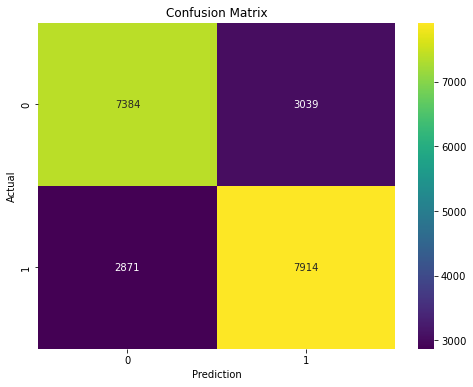

In [189]:
import seaborn as sns

#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()